In [ ]:
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# physical_devices = tf.config.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
# print(physical_devices)

In [4]:
train = pd.read_csv('Dataset/KDDTrain+.csv')
test = pd.read_csv('Dataset/KDDTest+.csv')
test2 = pd.read_csv('Dataset/KDDTest-21.csv')

In [5]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
att = {'normal':0,
       'back':1,
       'buffer_overflow':2,
       'ftp_write':3,
       'guess_passwd':3,
       'imap':3,
       'ipsweep':4,
       'land':1,
       'loadmodule':2,
       'multihop':3,
       'neptune':1,
       'nmap':4,
       'perl':2,
       'phf':3,
       'pod':1,
       'portsweep':4,
       'rootkit':2,
       'satan':4,
       'smurf':1,
       'spy':3,
       'teardrop':1,
       'warezclient':3,
       'warezmaster':3
    }

x_train = train.iloc[:, train.columns != 'class']
y_train = train['class']

x_test = test.iloc[:, test.columns != 'class']
y_test = test['class']

x_test2 = test2.iloc[:, test2.columns != 'class']
y_test2 = test2['class']

In [ ]:
#Encodes the categorical columns
for column in x_train.columns:
    if x_train[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        x_train[column] = le.fit_transform(x_train[column])

for column in x_test.columns:
    if x_test[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        x_test[column] = le.fit_transform(x_test[column])

for column in x_test2.columns:
    if x_test2[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        x_test2[column] = le.fit_transform(x_test2[column])

In [8]:
x_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
Y_train = []
Y_test = []
Y_test2 = []

#Assigning integers to represent the 22 types of attacks
for i in y_train:
    if i in att.keys():
        if att[i] == 0:
            Y_train.append(0)
        else:
            Y_train.append(1)
    else:
        Y_train.append(1)

for i in y_test:
    if i in att.keys():
        if att[i] == 0:
            Y_test.append(0)
        else:
            Y_test.append(1)
    else:
        Y_test.append(1)

for i in y_test2:
    if i in att.keys():
        if att[i] == 0:
            Y_test2.append(0)
        else:
            Y_test2.append(1)
    else:
        Y_test2.append(1)


Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)
Y_test2 = np.asarray(Y_test2)

In [10]:
#Initialize the no of hidden neurons, learning rate and epoch
hidden_neurons = 80
lr = 0.001
ep = 30

In [11]:
classifier = Sequential()

classifier.add(Dense(2048, activation='relu', input_dim=41)) #Since we have 42 columns

classifier.add(Dense(1024, activation='relu')) #Since we have 42 columns

classifier.add(Dense(512, activation='relu'))

classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(128, activation='relu'))

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(32, activation='relu'))

classifier.add(Dense(16, activation='relu'))

classifier.add(Dense(8, activation='relu'))

classifier.add(Dense(4, activation='relu'))

classifier.add(Dense(2, activation='relu'))

classifier.add(Dense(1, activation='sigmoid'))
# opt = optimizers.Adam(learning_rate=lr)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['acc'])

2022-07-17 00:21:48.950665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-17 00:21:48.950704: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-17 00:21:48.950733: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nishanth-hp-spectre): /proc/driver/nvidia/version does not exist
2022-07-17 00:21:48.951000: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              86016     
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [13]:
#Fitting the NN to the training set
start = datetime.now()
keras_callback=[EarlyStopping(monitor='loss',patience=3,mode='min',min_delta=0.001), ModelCheckpoint('Callback_Check_Point',monitor='loss',save_best_only=True)]
a = classifier.fit(x_train, Y_train, epochs = ep, validation_split = 0.10, callbacks=[keras_callback])
train_time = datetime.now() - start

Epoch 1/30
3542/3543 [============================>.] - ETA: 0s - loss: 45.5867 - acc: 0.9067

2022-07-17 00:22:51.718661: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Callback_Check_Point/assets
3543/3543 [==============================] - 63s 18ms/step - loss: 45.5743 - acc: 0.9067 - val_loss: 0.2596 - val_acc: 0.9120
Epoch 2/30
3543/3543 [==============================] - 71s 20ms/step - loss: 0.2719 - acc: 0.9264 - val_loss: 0.1371 - val_acc: 0.9615
Epoch 3/30
3543/3543 [==============================] - 66s 19ms/step - loss: 0.1563 - acc: 0.9539 - val_loss: 0.1800 - val_acc: 0.9479
Epoch 4/30
3543/3543 [==============================] - 64s 18ms/step - loss: 0.1782 - acc: 0.9477 - val_loss: 0.1751 - val_acc: 0.9486
Epoch 5/30
3543/3543 [==============================] - 64s 18ms/step - loss: 0.2038 - acc: 0.9487 - val_loss: 0.1749 - val_acc: 0.9484
Epoch 6/30
3543/3543 [==============================] - 64s 18ms/step - loss: 0.1732 - acc: 0.9490 - val_loss: 0.1762 - val_acc: 0.9482


In [14]:
#Predicting the testing set
pred = classifier.predict(x_test)
pred1 = np.argmax(pred, axis=1)

pred = classifier.predict(x_test2)
pred2 = np.argmax(pred, axis=1)

In [15]:
#Print Accuracy
test_accuracy = accuracy_score(Y_test, pred1)
test2_accuracy = accuracy_score(Y_test2, pred2)
print('Test+ Accuracy: ', test_accuracy)
print('Test-21 Accuracy: ', test2_accuracy)

Test+ Accuracy:  0.43075762952448543
Test-21 Accuracy:  0.18160337552742617


In [16]:
# Recal Score
test_recall=recall_score(Y_test, pred1)
test2_recall=recall_score(Y_test2, pred2)
print('Test+ Recall: ', test_recall)
print('Test-21 Recall: ', test2_recall)

Test+ Recall:  0.0
Test-21 Recall:  0.0


In [17]:
#Print Confusion Matrix
cm_test = confusion_matrix(Y_test, pred1)
cm_test2 = confusion_matrix(Y_test2, pred2)
print('Confusion Matrix for test+', cm_test)
print('Confusion Matrix for test-21', cm_test2)

Confusion Matrix for test+ [[ 9711     0]
 [12833     0]]
Confusion Matrix for test-21 [[2152    0]
 [9698    0]]


In [18]:
# Evaluate classifier model for test+ data
print("Test+ dataset")
print(classifier.evaluate(x_test, Y_test))

Test+ dataset
705/705 [==============================] - 3s 4ms/step - loss: 0.8308 - acc: 0.7335
[0.8308380246162415, 0.7334545850753784]


In [19]:
# Evaluate classifier model for test-21 data
print("Test-21 dataset")
print(classifier.evaluate(x_test2, Y_test2))

Test-21 dataset
371/371 [==============================] - 2s 4ms/step - loss: 1.5126 - acc: 0.4965
[1.5125911235809326, 0.4965400695800781]


In [20]:
#Print Time taken
print('time taken for train+: ', train_time)

time taken for train+:  0:06:32.462527


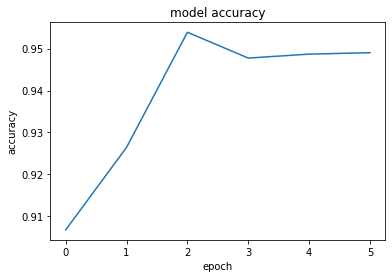

In [21]:
plt.plot(a.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [22]:
#Fitting the RNN to the training set test+ as validation data
start = datetime.now()
keras_callback=[EarlyStopping(monitor='loss',patience=3,mode='min',min_delta=0.001), ModelCheckpoint('Callback_Check_Point',monitor='loss',save_best_only=True)]
b = classifier.fit(x_train, Y_train, epochs = ep, validation_data=(x_test, Y_test), callbacks=[keras_callback])
train_time = datetime.now() - start

Epoch 1/30
3937/3937 [==============================] - 65s 17ms/step - loss: 0.1759 - acc: 0.9484 - val_loss: 0.8275 - val_acc: 0.7401
Epoch 2/30
3937/3937 [==============================] - 76s 19ms/step - loss: 0.1734 - acc: 0.9490 - val_loss: 0.8349 - val_acc: 0.7535
Epoch 3/30
3937/3937 [==============================] - 72s 18ms/step - loss: 0.6952 - acc: 0.9494 - val_loss: 0.7741 - val_acc: 0.7180
Epoch 4/30
3937/3937 [==============================] - 74s 19ms/step - loss: 0.1722 - acc: 0.9496 - val_loss: 0.8248 - val_acc: 0.7236
Epoch 5/30
3937/3937 [==============================] - 75s 19ms/step - loss: 0.1708 - acc: 0.9498 - val_loss: 0.8487 - val_acc: 0.7306
Epoch 6/30
3937/3937 [==============================] - 74s 19ms/step - loss: 0.1714 - acc: 0.9498 - val_loss: 0.9267 - val_acc: 0.7142
Epoch 7/30
3937/3937 [==============================] - 72s 18ms/step - loss: 0.1718 - acc: 0.9498 - val_loss: 0.8400 - val_acc: 0.7309
Epoch 8/30
3937/3937 [==========================

In [29]:
# Evaluate classifier model for test+ data
print("Test+ dataset")
print(classifier.evaluate(x_test, Y_test))

Test+ dataset
705/705 [==============================] - 2s 3ms/step - loss: 0.8471 - acc: 0.7409
[0.8470892310142517, 0.7409066557884216]


In [30]:
# Evaluate classifier model for test-21 data
print("Test-21 dataset")
print(classifier.evaluate(x_test2, Y_test2))

Test-21 dataset
371/371 [==============================] - 1s 4ms/step - loss: 1.5309 - acc: 0.5116
[1.53091299533844, 0.5116455554962158]


In [31]:
#Print Time taken
print('time taken for train+ with test+ validation: ', train_time)

time taken for train+ with test+ validation:  0:09:42.003916


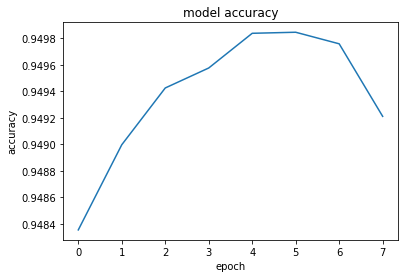

In [32]:
plt.plot(b.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [34]:
#Fitting the NN to the training set with test-21 as validation data
start = datetime.now()
keras_callback=[EarlyStopping(monitor='loss',patience=3,mode='min',min_delta=0.001), ModelCheckpoint('Callback_Check_Point',monitor='loss',save_best_only=True)]
c = classifier.fit(x_train, Y_train, epochs = ep, validation_data=(x_test2, Y_test2), callbacks=[keras_callback])
train_time = datetime.now() - start

Epoch 1/30
3937/3937 [==============================] - 74s 19ms/step - loss: 0.1943 - acc: 0.9503 - val_loss: 1.4816 - val_acc: 0.5228
Epoch 2/30
3937/3937 [==============================] - 71s 18ms/step - loss: 0.1698 - acc: 0.9503 - val_loss: 1.5594 - val_acc: 0.4868
Epoch 3/30
3937/3937 [==============================] - 70s 18ms/step - loss: 0.1698 - acc: 0.9506 - val_loss: 1.6988 - val_acc: 0.5032
Epoch 4/30
3937/3937 [==============================] - 72s 18ms/step - loss: 0.1719 - acc: 0.9501 - val_loss: 1.4852 - val_acc: 0.4725
Epoch 5/30
3937/3937 [==============================] - 70s 18ms/step - loss: 0.1700 - acc: 0.9504 - val_loss: 1.6702 - val_acc: 0.5484


In [39]:
# Evaluate classifier model for test+ data
print("Test+ dataset")
print(classifier.evaluate(x_test, Y_test))

Test+ dataset
705/705 [==============================] - 3s 4ms/step - loss: 0.9291 - acc: 0.7590
[0.9291019439697266, 0.7590045928955078]


In [40]:
# Evaluate classifier model for test-21 data
print("Test-21 dataset")
print(classifier.evaluate(x_test2, Y_test2))

Test-21 dataset
371/371 [==============================] - 1s 4ms/step - loss: 1.6702 - acc: 0.5484
[1.6702312231063843, 0.5484388470649719]


In [41]:
#Print Time taken
print('time taken for train+ with test+ validation: ', train_time)

time taken for train+ with test+ validation:  0:05:57.956938


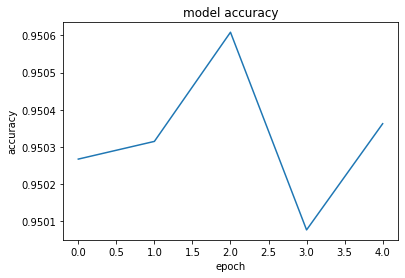

In [42]:
plt.plot(c.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()